In [1]:
# Create train and test data and flatten it
from cifar10helper import load_cifar10


# Load binary classification data (airplane vs rest)
x_train_binary, y_train_binary, x_test_binary, y_test_binary = load_cifar10(binary=True, target_class=0)

# Load categorical classification data
x_train_categorical, y_train_categorical, x_test_categorical, y_test_categorical = load_cifar10(binary=False)
y_train_categorical = y_train_categorical.astype(int)  # Ensure labels are integers
y_test_categorical = y_test_categorical.astype(int)


In [5]:
# Import neural network and plotting
from neuralnetwork import (NeuralNetwork, DenseLayer,
                           BinaryClassification,
                           CategoricalClassification,
                           Sigmoid, Softmax, ReLU)
from plot import plot_confusion_matrix_and_f1, plot_history
import cupy as cp

## Task 1: Logistic Regression for binary classification

In [6]:
# Create model (single layer with sigmoid activation)
model1 = NeuralNetwork([
    # 3072 input features, 1 output
    DenseLayer(3072, 1, activation=Sigmoid)
])


In [7]:
# Train model
print("Training logistic regression model...")
history1 = model1.train(x_train_binary, y_train_binary, x_test_binary, y_test_binary,
                      classification_task=BinaryClassification,
                      epochs=100, learning_rate=0.001, )


Training logistic regression model...
Epoch 1/100 | Loss: 0.6406 | Acc: 0.7264 | Val Loss: 0.6030 | Val Acc: 0.7038
Epoch 2/100 | Loss: 0.5833 | Acc: 0.7787 | Val Loss: 0.5680 | Val Acc: 0.7206
Epoch 3/100 | Loss: 0.5577 | Acc: 0.7943 | Val Loss: 0.5482 | Val Acc: 0.7315
Epoch 4/100 | Loss: 0.5416 | Acc: 0.8046 | Val Loss: 0.5345 | Val Acc: 0.7366
Epoch 5/100 | Loss: 0.5300 | Acc: 0.8110 | Val Loss: 0.5242 | Val Acc: 0.7421
Epoch 6/100 | Loss: 0.5211 | Acc: 0.8154 | Val Loss: 0.5161 | Val Acc: 0.7465
Epoch 7/100 | Loss: 0.5138 | Acc: 0.8192 | Val Loss: 0.5095 | Val Acc: 0.7506
Epoch 8/100 | Loss: 0.5079 | Acc: 0.8228 | Val Loss: 0.5040 | Val Acc: 0.7546
Epoch 9/100 | Loss: 0.5029 | Acc: 0.8260 | Val Loss: 0.4993 | Val Acc: 0.7582
Epoch 10/100 | Loss: 0.4986 | Acc: 0.8292 | Val Loss: 0.4953 | Val Acc: 0.7624
Epoch 11/100 | Loss: 0.4948 | Acc: 0.8323 | Val Loss: 0.4918 | Val Acc: 0.7650
Epoch 12/100 | Loss: 0.4916 | Acc: 0.8351 | Val Loss: 0.4887 | Val Acc: 0.7674
Epoch 13/100 | Loss: 0.

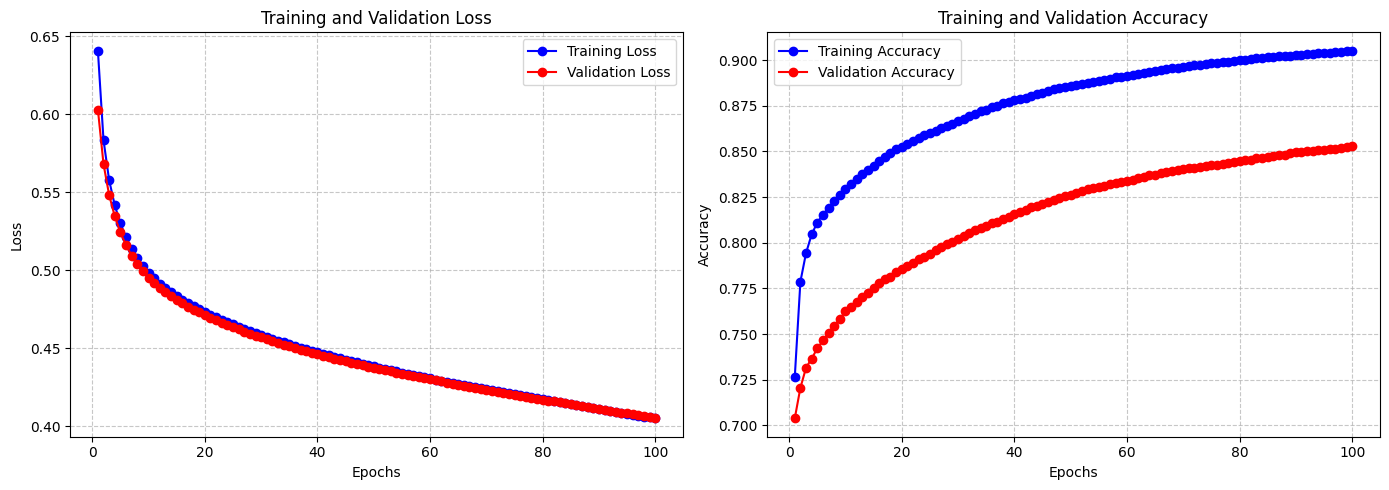

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.5508    0.3250    0.4088      1000
Not Airplane     0.9283    0.9706    0.9489      9000

    accuracy                         0.9060     10000
   macro avg     0.7396    0.6478    0.6789     10000
weighted avg     0.8905    0.9060    0.8949     10000



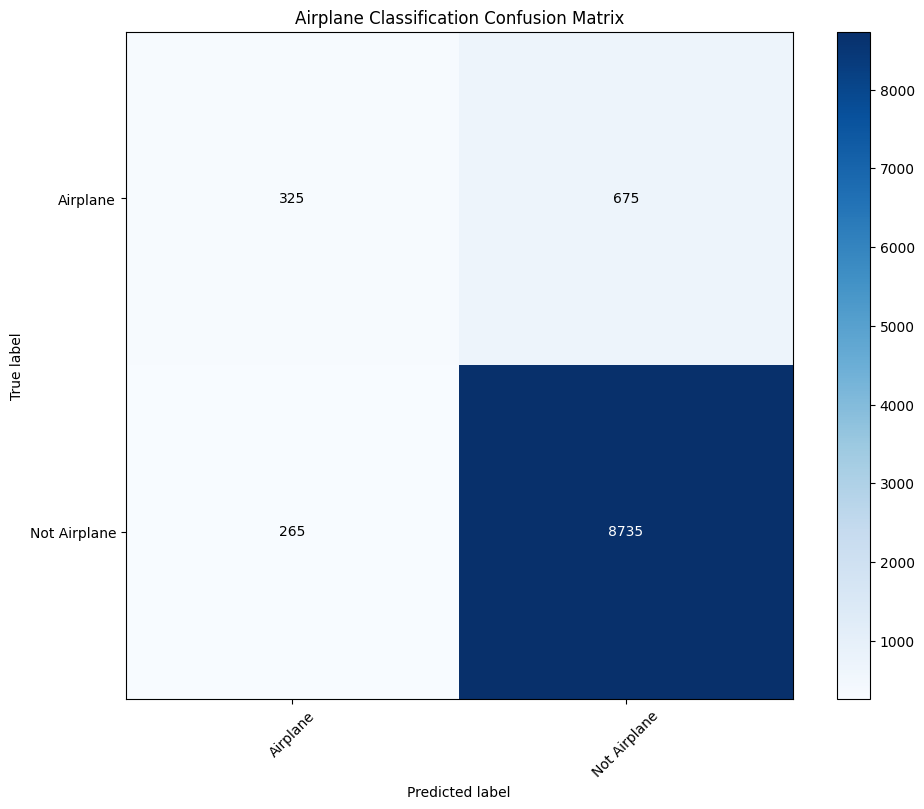

In [8]:
# Plot training history
plot_history(history1)

# Evaluate
y_prediction1 = (model1.forward(x_test_binary) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_binary, y_prediction1,
                             classes=['Airplane', 'Not Airplane'],
                             title='Airplane Classification Confusion Matrix')


## Task 2: Binary Classification Network with Hidden Layer


In [10]:
# Create model with one hidden layer
model2 = NeuralNetwork([
    DenseLayer(3072, 64, activation=Sigmoid),  # Hidden layer with 64 neurons
    DenseLayer(64, 1, activation=Sigmoid)      # Output layer
])


In [13]:
# Train model
print("Training network with hidden layer...")
history2 = model2.train(x_train_binary, y_train_binary, x_test_binary, y_test_binary,
                      epochs=20, learning_rate=0.1,
                      classification_task=BinaryClassification,
                      )


Training network with hidden layer...
Epoch 1/20 | Loss: 0.3014 | Acc: 0.9000 | Val Loss: 0.3022 | Val Acc: 0.9000
Epoch 2/20 | Loss: 0.2948 | Acc: 0.9000 | Val Loss: 0.2963 | Val Acc: 0.9000
Epoch 3/20 | Loss: 0.2893 | Acc: 0.9000 | Val Loss: 0.2904 | Val Acc: 0.8996
Epoch 4/20 | Loss: 0.2834 | Acc: 0.9007 | Val Loss: 0.2840 | Val Acc: 0.8976
Epoch 5/20 | Loss: 0.2769 | Acc: 0.9025 | Val Loss: 0.2770 | Val Acc: 0.8947
Epoch 6/20 | Loss: 0.2699 | Acc: 0.9037 | Val Loss: 0.2699 | Val Acc: 0.8911
Epoch 7/20 | Loss: 0.2632 | Acc: 0.9055 | Val Loss: 0.2633 | Val Acc: 0.8877
Epoch 8/20 | Loss: 0.2570 | Acc: 0.9065 | Val Loss: 0.2576 | Val Acc: 0.8842
Epoch 9/20 | Loss: 0.2519 | Acc: 0.9068 | Val Loss: 0.2529 | Val Acc: 0.8815
Epoch 10/20 | Loss: 0.2477 | Acc: 0.9076 | Val Loss: 0.2492 | Val Acc: 0.8797
Epoch 11/20 | Loss: 0.2446 | Acc: 0.9083 | Val Loss: 0.2465 | Val Acc: 0.8786
Epoch 12/20 | Loss: 0.2422 | Acc: 0.9089 | Val Loss: 0.2444 | Val Acc: 0.8775
Epoch 13/20 | Loss: 0.2404 | Acc: 0

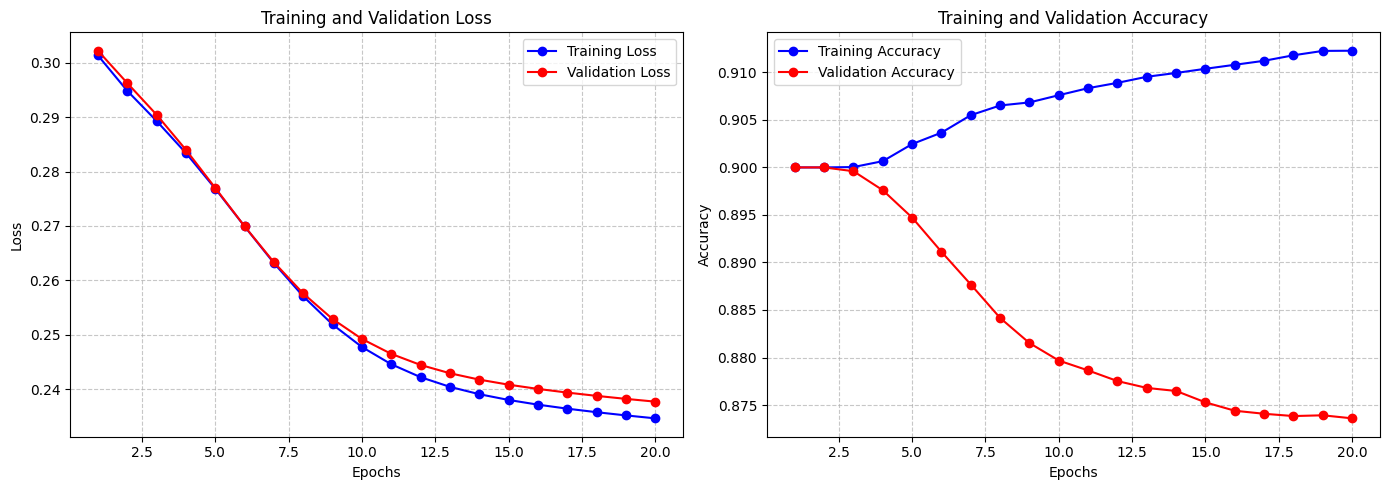

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.7000    0.2310    0.3474      1000
Not Airplane     0.9205    0.9890    0.9535      9000

    accuracy                         0.9132     10000
   macro avg     0.8102    0.6100    0.6504     10000
weighted avg     0.8984    0.9132    0.8929     10000



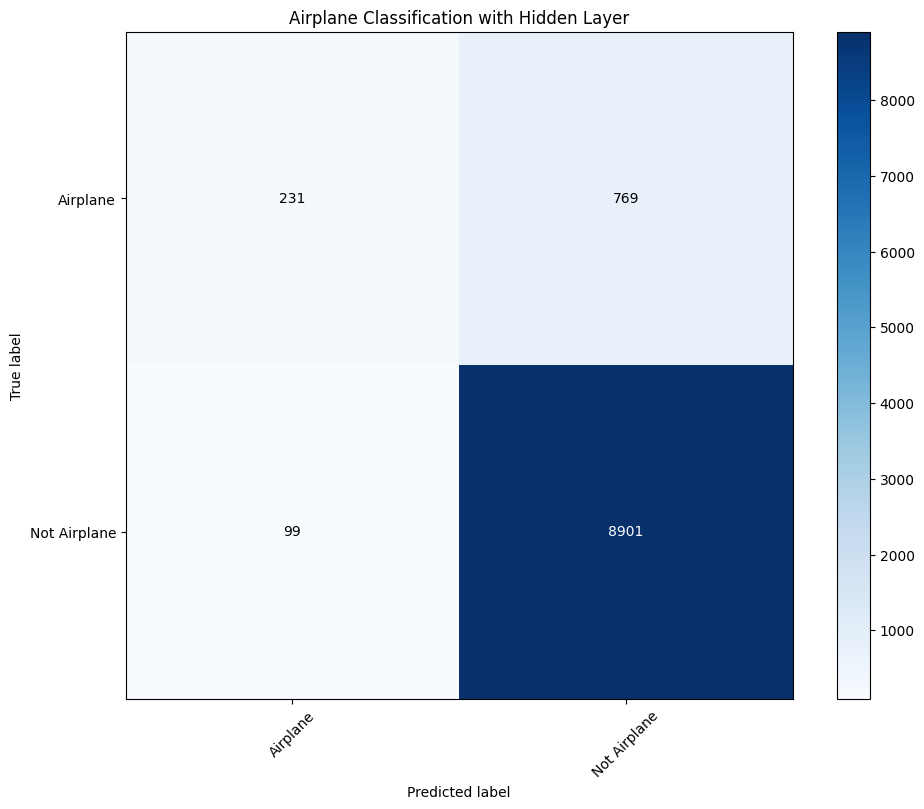

In [14]:
# Plot training history
plot_history(history2)

y_prediction2 = (model2.forward(x_test_binary) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_binary, y_prediction2,
                             classes=['Airplane', 'Not Airplane'],
                             title='Airplane Classification with Hidden Layer')


## Task 3: Multiclass Classification

In [19]:
# Create model with Sigmoid hidden layer and softmax output
model3 = NeuralNetwork([
    DenseLayer(3072, 128, activation=ReLU),  # Hidden layer with ReLU
    DenseLayer(128, 10, activation=Softmax)  # 10-class output with softmax
])


In [20]:
history3 = model3.train(x_train_categorical, y_train_categorical, x_test_categorical, y_test_categorical,
                         epochs=50, learning_rate=0.005, classification_task=CategoricalClassification)

Epoch 1/50 | Loss: 2.2447 | Acc: 0.2093 | Val Loss: 2.1567 | Val Acc: 0.2502
Epoch 2/50 | Loss: 2.0849 | Acc: 0.2571 | Val Loss: 2.0133 | Val Acc: 0.2883
Epoch 3/50 | Loss: 1.9675 | Acc: 0.3023 | Val Loss: 1.9162 | Val Acc: 0.3207
Epoch 4/50 | Loss: 1.8862 | Acc: 0.3322 | Val Loss: 1.8508 | Val Acc: 0.3447
Epoch 5/50 | Loss: 1.8304 | Acc: 0.3520 | Val Loss: 1.8041 | Val Acc: 0.3628
Epoch 6/50 | Loss: 1.7883 | Acc: 0.3666 | Val Loss: 1.7661 | Val Acc: 0.3770
Epoch 7/50 | Loss: 1.7535 | Acc: 0.3802 | Val Loss: 1.7339 | Val Acc: 0.3884
Epoch 8/50 | Loss: 1.7240 | Acc: 0.3912 | Val Loss: 1.7065 | Val Acc: 0.3955
Epoch 9/50 | Loss: 1.6986 | Acc: 0.4007 | Val Loss: 1.6828 | Val Acc: 0.4056
Epoch 10/50 | Loss: 1.6763 | Acc: 0.4097 | Val Loss: 1.6623 | Val Acc: 0.4121
Epoch 11/50 | Loss: 1.6564 | Acc: 0.4183 | Val Loss: 1.6442 | Val Acc: 0.4207
Epoch 12/50 | Loss: 1.6384 | Acc: 0.4251 | Val Loss: 1.6281 | Val Acc: 0.4257
Epoch 13/50 | Loss: 1.6218 | Acc: 0.4304 | Val Loss: 1.6135 | Val Acc: 0.

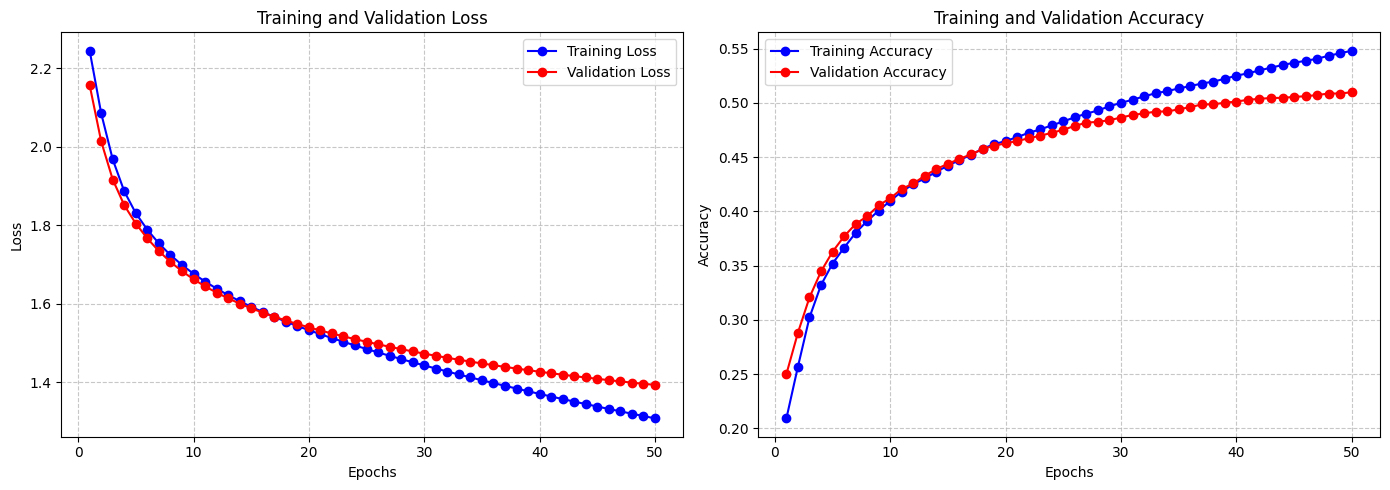

Classification Report:
              precision    recall  f1-score   support

    airplane     0.5959    0.5840    0.5899      1000
  automobile     0.6030    0.5970    0.6000      1000
        bird     0.4269    0.3270    0.3703      1000
         cat     0.3580    0.3430    0.3504      1000
        deer     0.4403    0.3800    0.4079      1000
         dog     0.4317    0.3920    0.4109      1000
        frog     0.4860    0.6400    0.5524      1000
       horse     0.5580    0.5720    0.5649      1000
        ship     0.5958    0.6750    0.6329      1000
       truck     0.5547    0.5880    0.5709      1000

    accuracy                         0.5098     10000
   macro avg     0.5050    0.5098    0.5051     10000
weighted avg     0.5050    0.5098    0.5051     10000



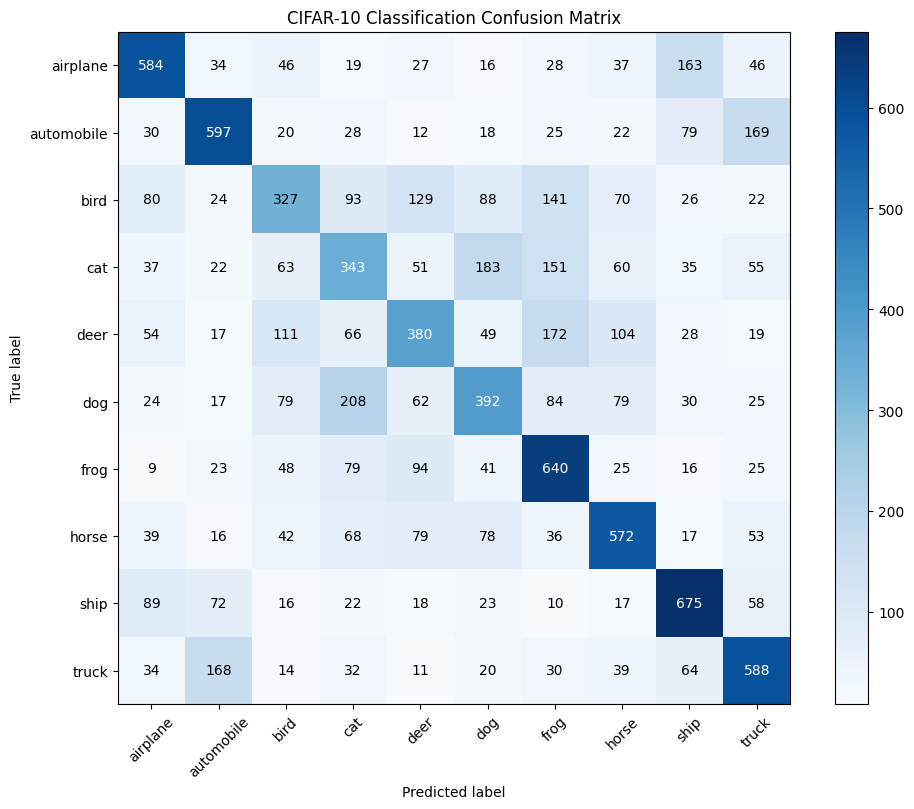

In [21]:
# Plot training history
plot_history(history3)

# Get predictions
y_perdiction3 = cp.argmax(model3.forward(x_test_categorical), axis=1)

# Define CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_categorical, y_perdiction3,
                             classes=cifar10_classes,
                             title='CIFAR-10 Classification Confusion Matrix')